# Medical Insurance Cost Prediction

## Importing the dependencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection and Analysis

In [2]:
dataset = pd.read_csv('insurance.csv')
insurance_dataset = dataset.copy()

In [3]:
insurance_dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset = insurance_dataset.rename(columns={'age': 'Age','sex':'Sex','bmi':'BMI','children':'Children','smoker':'Smoker','region':'Region','charges':'Charges'})

In [5]:
insurance_dataset.head(5)

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# no of rows and cols 
insurance_dataset.shape

(1338, 7)

In [7]:
# Info about dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Sex       1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# checking for missing values
insurance_dataset.isnull().sum()

Age         0
Sex         0
BMI         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64

## Data Analysis

In [9]:
# Statistical measures of dataset 
insurance_dataset.describe()

,Age,BMI,Children,Charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


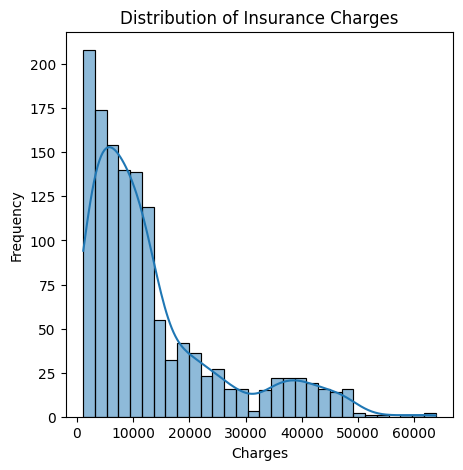

In [10]:
# Charges Distribution
plt.figure(figsize=(5,5))
sns.histplot(dataset['charges'],kde=True,bins=30)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

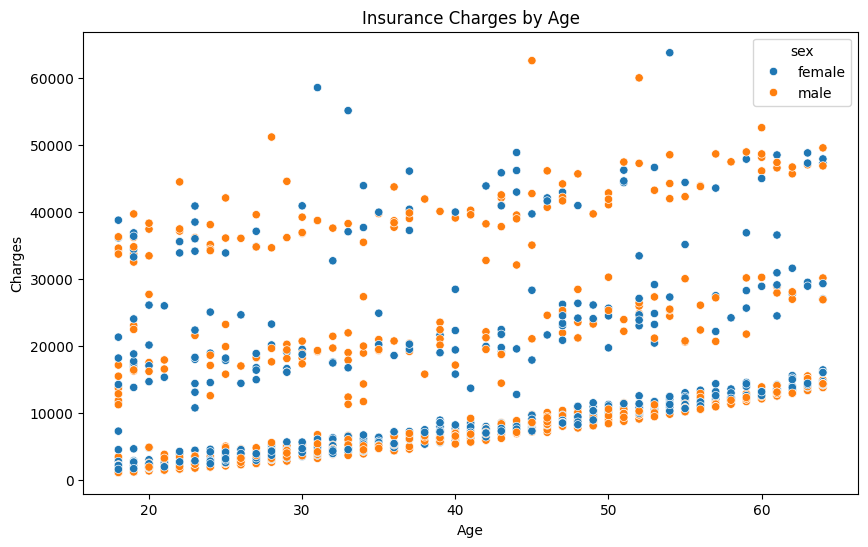

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset,x='age',y='charges',hue='sex')
plt.title('Insurance Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

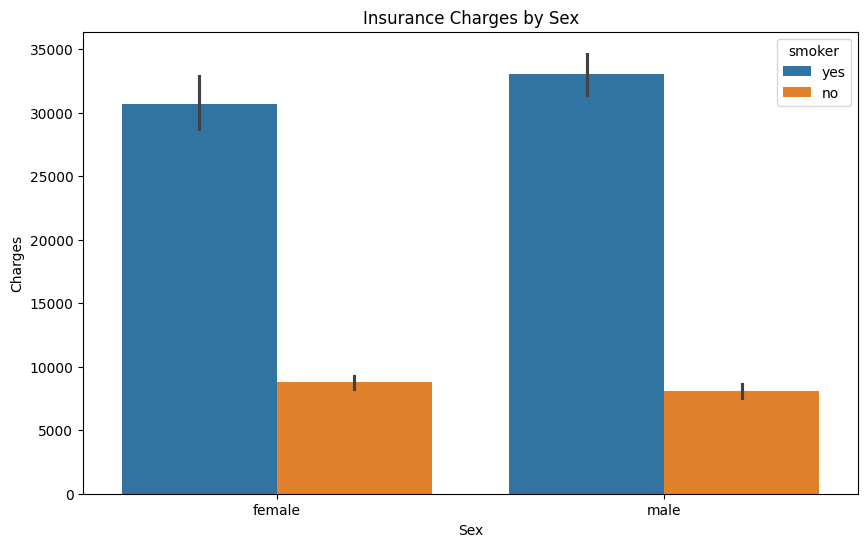

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=dataset,x='sex',y='charges',hue='smoker')
plt.title('Insurance Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

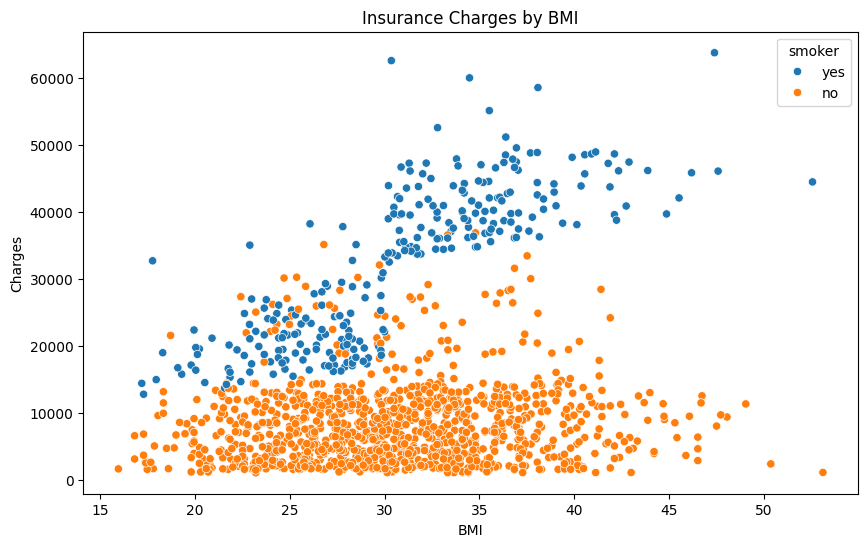

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset,x='bmi',y='charges',hue='smoker')
plt.title('Insurance Charges by BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

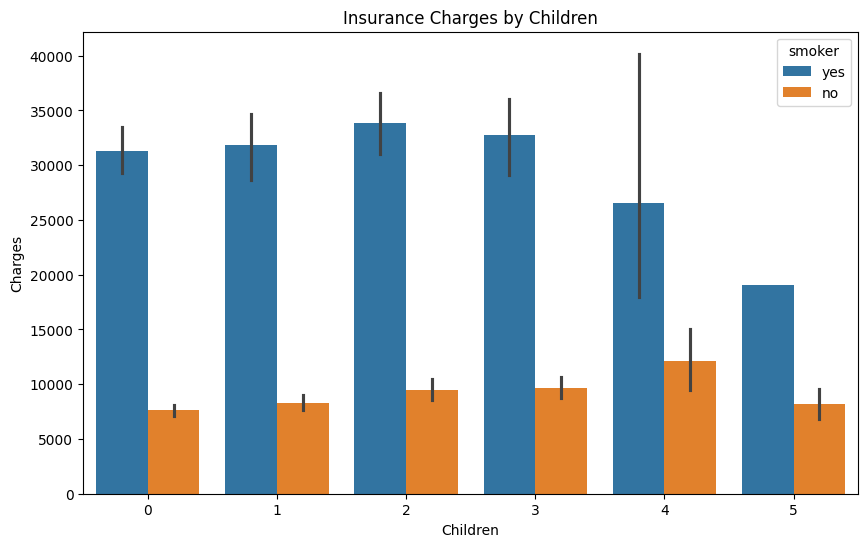

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=dataset,x='children',y='charges',hue='smoker')
plt.title('Insurance Charges by Children')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()

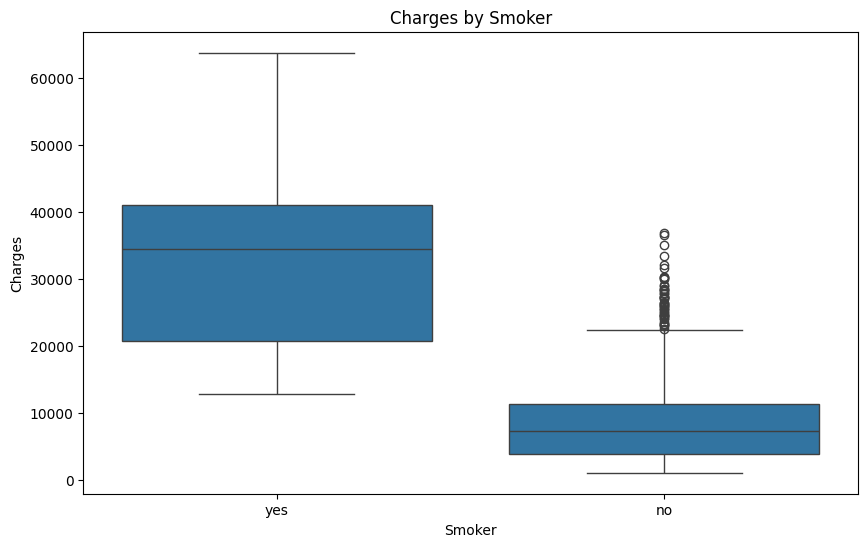

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='smoker', y='charges')
plt.title('Charges by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

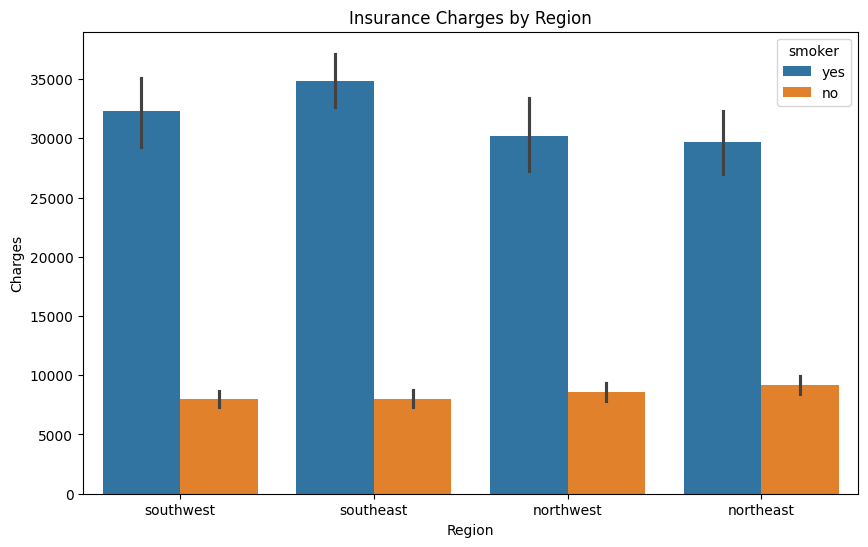

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data=dataset,x='region',y='charges',hue='smoker')
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

## Data Preprocessing

### Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

insurance_dataset['Sex'] = le.fit_transform(insurance_dataset['Sex'])
insurance_dataset['Smoker'] = le.fit_transform(insurance_dataset['Smoker'])
insurance_dataset['Region'] = le.fit_transform(insurance_dataset['Region'])

In [18]:
insurance_dataset.head(5)

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Splitting the features and target

In [19]:
x = insurance_dataset.drop(columns='Charges',axis=1)
y = insurance_dataset['Charges']

In [20]:
x

,Age,Sex,BMI,Children,Smoker,Region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [21]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: Charges, Length: 1338, dtype: float64

### Splitting the data into test and train

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
print(x.shape , x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Model training using linear regression 

In [24]:
reg = LinearRegression()

In [25]:
reg.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [26]:
train_data_prediction = reg.predict(x_train)

# R sq value
r2_train = metrics.r2_score(y_train,train_data_prediction)
print('R sq. value for train data:',r2_train)

R sq. value for train data: 0.7519923667088932


In [27]:
test_data_prediction = reg.predict(x_test)

r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R sq. value for test data:',r2_test)

R sq. value for test data: 0.7445422986536503


In [28]:
from sklearn.metrics import mean_absolute_error

y_pred_test = reg.predict(x_test)
mae = mean_absolute_error(y_test, y_pred_test)
average_charges = y_test.mean()

print(mae)
print('mae_percentage =',(mae / average_charges) * 100,"%")

4285.219437633698
mae_percentage = 33.343548279258144 %


## Building a Predictive System

In [29]:
input = pd.DataFrame({
    'Age': [31],
    'Sex': [1],
    'BMI': [25.74],
    'Children': [0],
    'Smoker': [1],
    'Region': [0]
})

In [30]:
prediction = reg.predict(input)

In [31]:
print("The predicted charges: Rs",prediction[0])

The predicted charges: Rs 28429.234718796433
